In [14]:
import numpy as np
import os
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import random
from PointNet import PointNet

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, classification_report

DATA_PATH = os.path.join('Keypoint Dataset', "V2")
actions = np.array([folder for folder in os.listdir(DATA_PATH)])

In [15]:
label_map = {label:num for num, label in enumerate(actions)}

dataset, labels = [], []
for action in actions:
    for data in range(len(os.listdir(os.path.join(DATA_PATH, action)))):
        res = np.load(os.path.join(DATA_PATH, action, "{}.npy".format(data)), allow_pickle=True)
        dataset.append(res)
        labels.append(label_map[action])

In [16]:
X = np.array(dataset)

y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [17]:
def build_model():
    cnnModel = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPool1D(),
        Conv1D(64, 3, activation='relu'),
        MaxPool1D(),
        Conv1D(128, 3, activation='relu'),
        MaxPool1D(),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(actions.shape[0], activation='softmax')
    ])

    cnnModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return cnnModel

In [18]:
cnnModel = build_model()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

startTime = time.time()
history = cnnModel.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])
endTime = time.time()
print("Training Duration: ", endTime - startTime)

cnnModel.save('CNN V2.h5')
predictions = cnnModel.predict(X_test)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y_test]
acc = accuracy_score(y_test2, predictions)

C:\Users\leozh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.0968 - loss: 2.9854 - val_accuracy: 0.1902 - val_loss: 2.8725
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2439 - loss: 2.4441 - val_accuracy: 0.3026 - val_loss: 2.7580
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3178 - loss: 2.1622 - val_accuracy: 0.3862 - val_loss: 2.5329
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3964 - loss: 1.9561 - val_accuracy: 0.5101 - val_loss: 2.2332
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4603 - loss: 1.7522 - val_accuracy: 0.6311 - val_loss: 1.8556
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5154 - loss: 1.5661 - val_accuracy: 0.6599 - val_loss: 1.4593
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5758 - loss: 1.3686 - val_accuracy: 0.6801 - val_loss: 1.1746
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6170 - loss: 1.2680 - val_accuracy: 0

Training Duration:  56.664870500564575
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 0.8670520231213873
Precision Score: 0.8760860131527497
Recall Score: 0.8670520231213873
F1 Score: 0.8676005706695152
Classification Report:               precision    recall  f1-score   support

        Anda       0.83      0.83      0.83        24
         Apa       0.79      1.00      0.88        22
    Berhenti       0.91      0.91      0.91        11
       Bodoh       0.87      0.81      0.84        16
      Cantik       1.00      0.86      0.92        14
        Halo       1.00      1.00      1.00         8
   Hati-hati       1.00      0.88      0.94        17
       Lelah       0.78      0.93      0.85        15
        Maaf       1.00      1.00      1.00        24
       Makan       1.00      0.70      0.82        10
   Mau-Ingin       0.89      0.85      0.87        20
     Membaca       0.71      0.67      0.69        18
        Nama       0.47      0.53      0.50        17
   Sama-sama       0.93      0.78      0.85        18

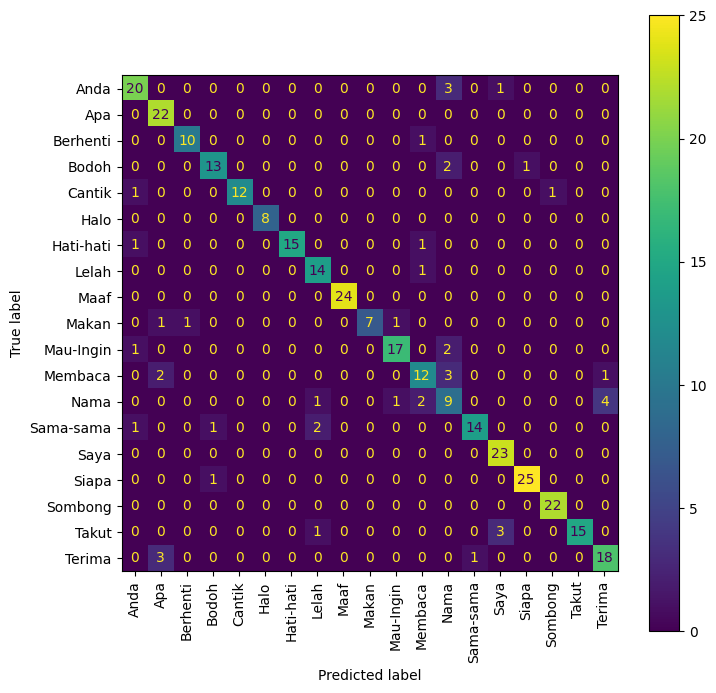

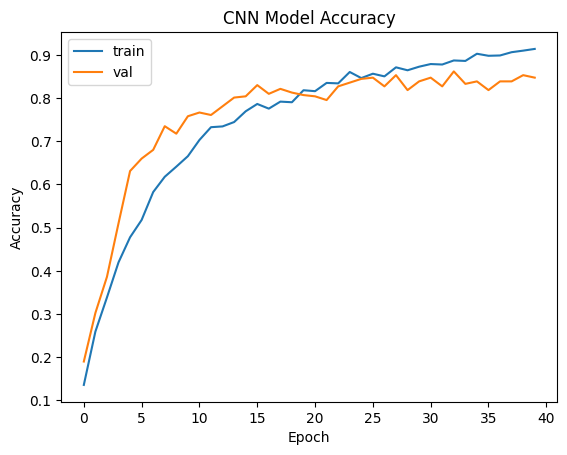

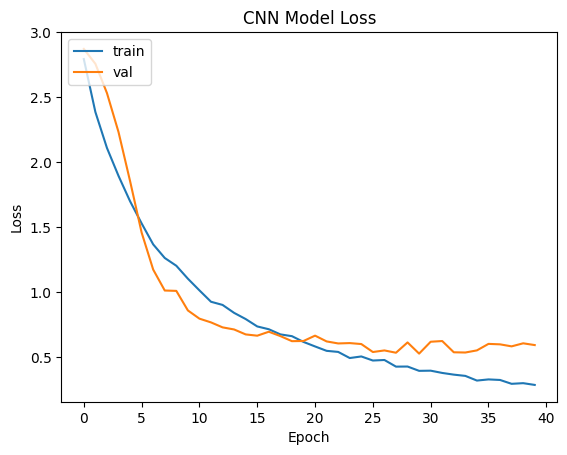

In [19]:
predictions = cnnModel.predict(X_test)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y_test]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test2, predictions), display_labels = actions)
print(f"Accuracy: {accuracy_score(y_test2, predictions)}")
print(f"Precision Score: {precision_score(y_test2, predictions, average='weighted')}")
print(f"Recall Score: {recall_score(y_test2, predictions, average='weighted')}")
print(f"F1 Score: {f1_score(y_test2, predictions, average='weighted')}")

print(f"Classification Report: {classification_report(y_test2, predictions, target_names=actions)}")

fig, ax = plt.subplots(figsize=(8,8))
print(f"Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
model_name = "pointnetv2"
device = "cpu"
train = []

id2label = {}

for index, folder in enumerate(os.listdir(DATA_PATH)):
    folder_path = os.path.join(DATA_PATH, folder)
    id2label[index] = folder
    for data_name in os.listdir(folder_path):
        data = np.load(os.path.join(folder_path, data_name), allow_pickle=True)
        # data = data[:-1]
        train.append({'label':index, 'data':data.tolist()})

random.shuffle(train)
TEST_SIZE = (int)(len(train) * 0.1)
VAL_SIZE = (int)(len(train) * 0.1)
test = train[-TEST_SIZE:]
val = train[-(TEST_SIZE + VAL_SIZE):-TEST_SIZE]
train = train[:-(TEST_SIZE + VAL_SIZE)]

train_tensors = []
for i in train:
    train_tensors.append({
        "data": torch.tensor(i["data"]).float(),
        "label": torch.tensor(i["label"]).long()
    })

test_tensors = []
for i in test:
    test_tensors.append({
        "data": torch.tensor(i["data"]).float(),
        "label": torch.tensor(i["label"]).long()
    })

val_tensors = []
for i in val:
    val_tensors.append({
        "data": torch.tensor(i["data"]).float(),
        "label": torch.tensor(i["label"]).long()
    })

train_loader = DataLoader(train_tensors, batch_size=32, shuffle=True)
test_loader = DataLoader(test_tensors, batch_size=32, shuffle=True)
val_loader = DataLoader(val_tensors, batch_size=32, shuffle=True)

In [9]:
num_classes = len(id2label)
pointnet = PointNet(classes=num_classes, device=device)

In [10]:
checkpoint_path = f"Checkpoint/{model_name}.pth"

def pointnetloss(outputs, labels, m3x3, m64x64, alpha = 0.0001):
    criterion = torch.nn.NLLLoss()
    bs=outputs.size(0)
    id3x3 = torch.eye(3, requires_grad=True).repeat(bs,1,1).to(device)
    id64x64 = torch.eye(64, requires_grad=True).repeat(bs,1,1).to(device)
    diff3x3 = id3x3 - torch.bmm(m3x3,m3x3.transpose(1,2))
    diff64x64 = id64x64 - torch.bmm(m64x64,m64x64.transpose(1,2))
    return criterion(outputs, labels) + alpha * (torch.norm(diff3x3)+torch.norm(diff64x64)) / float(bs)

def train(model, train_loader, val_loader, epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    for epoch in range(epochs): 
        model.train()
        running_loss = 0.0
        print_every_x = 16
        total_train = 0
        correct_train = 0
        for i, data in enumerate(train_loader, 0):
            inputs = data['data'].to(device)
            labels = data['label'].to(device)
            optimizer.zero_grad()
            outputs, m3x3, m64x64 = model(inputs.transpose(1,2))
            _, predicted = torch.max(outputs.data, 1)

            loss = pointnetloss(outputs, labels, m3x3, m64x64)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % print_every_x == print_every_x - 1:
                print(f"[Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / print_every_x:.4f}]")
                running_loss = 0.0
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        total = correct = 0
        val_loss = 0
        with torch.no_grad():
            for data in val_loader:
                inputs, labels = data['data'].to(device).float(), data['label'].to(device)
                outputs, m3x3, m64x64 = model(inputs.transpose(1,2))
                loss = pointnetloss(outputs, labels, m3x3, m64x64)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        print(f'Epoch {epoch + 1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}% | Val Loss: {avg_val_loss:.4f} | Val Accuracy: {val_accuracy:.2f}%')
    return train_losses, val_losses, train_accuracies, val_accuracies
optimizer = torch.optim.Adam(pointnet.parameters(), lr=0.00025)
train_loss, val_loss, train_acc, val_acc = train(pointnet, train_loader, val_loader, epochs=80)
torch.save(pointnet.state_dict(), checkpoint_path)

[Epoch: 1, Batch: 16, Loss: 2.8397]
[Epoch: 1, Batch: 32, Loss: 2.6295]
[Epoch: 1, Batch: 48, Loss: 2.4466]
[Epoch: 1, Batch: 64, Loss: 2.4146]
[Epoch: 1, Batch: 80, Loss: 2.1937]
Epoch 1/80 | Train Loss: 0.1702 | Train Accuracy: 24.17% | Val Loss: 2.0819 | Val Accuracy: 39.31%
[Epoch: 2, Batch: 16, Loss: 2.0891]
[Epoch: 2, Batch: 32, Loss: 1.9061]
[Epoch: 2, Batch: 48, Loss: 2.0396]
[Epoch: 2, Batch: 64, Loss: 1.9456]
[Epoch: 2, Batch: 80, Loss: 1.9219]
Epoch 2/80 | Train Loss: 0.1555 | Train Accuracy: 39.25% | Val Loss: 1.7872 | Val Accuracy: 46.82%
[Epoch: 3, Batch: 16, Loss: 1.7166]
[Epoch: 3, Batch: 32, Loss: 1.7389]
[Epoch: 3, Batch: 48, Loss: 1.7588]
[Epoch: 3, Batch: 64, Loss: 1.7170]
[Epoch: 3, Batch: 80, Loss: 1.6988]
Epoch 3/80 | Train Loss: 0.1375 | Train Accuracy: 48.92% | Val Loss: 1.5073 | Val Accuracy: 56.65%
[Epoch: 4, Batch: 16, Loss: 1.5438]
[Epoch: 4, Batch: 32, Loss: 1.5141]
[Epoch: 4, Batch: 48, Loss: 1.6794]
[Epoch: 4, Batch: 64, Loss: 1.6382]
[Epoch: 4, Batch: 8

c:\Users\leozh\Leo\Coding\SignLanguageAI\Computer Vision Sign Language\PointNet.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, m

Accuracy: 0.8005780346820809
Precision Score: 0.8091250786135774
Recall Score: 0.8005780346820809
F1 Score: 0.8019448777404328
Classification Report:               precision    recall  f1-score   support

        Anda       0.62      0.83      0.71        12
         Apa       0.70      0.70      0.70        20
    Berhenti       1.00      0.83      0.91        12
       Bodoh       0.72      0.78      0.75        23
      Cantik       0.95      0.91      0.93        23
        Halo       0.93      1.00      0.97        14
   Hati-hati       0.81      0.81      0.81        21
       Lelah       0.77      0.67      0.71        15
        Maaf       1.00      0.93      0.96        14
       Makan       0.83      0.83      0.83        18
   Mau-Ingin       0.92      0.67      0.77        18
     Membaca       0.80      0.73      0.76        11
        Nama       0.57      0.53      0.55        15
   Sama-sama       0.89      0.85      0.87        20
        Saya       0.72      0.82      

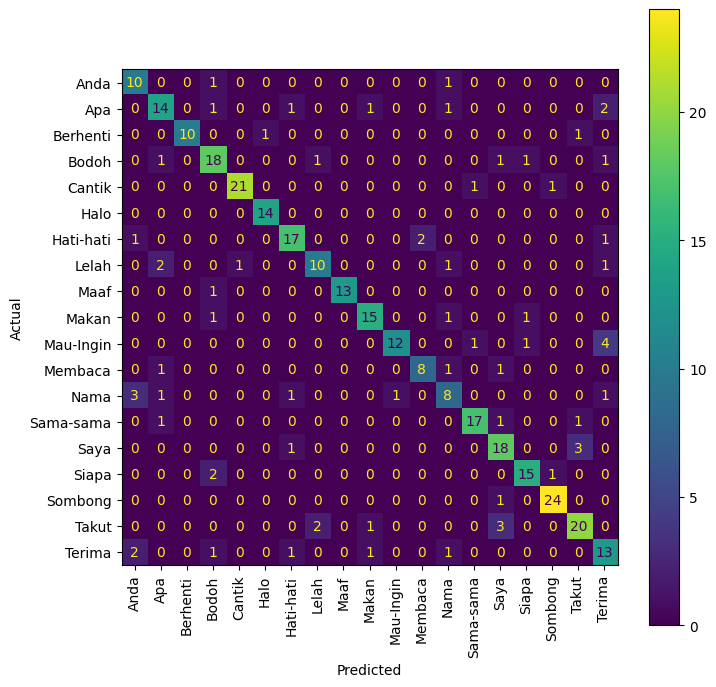

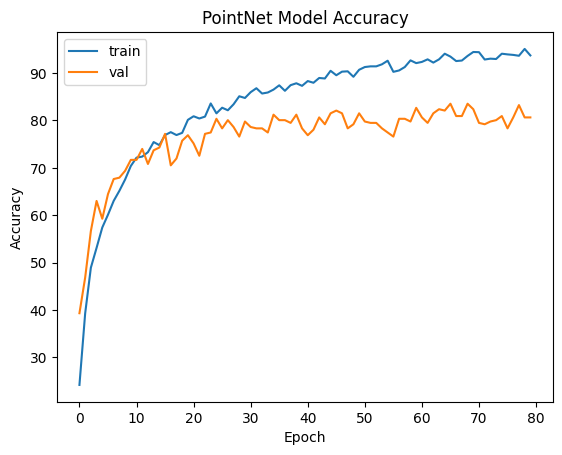

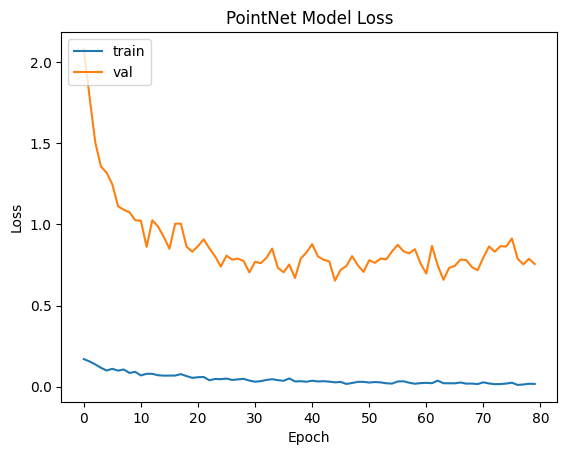

In [11]:
pointnet = PointNet(classes=num_classes, device="cpu")
pointnet.load_from_pth(checkpoint_path)
pointnet.eval()

all_preds = []
all_labels = []
with torch.no_grad():
    for i, data in enumerate(test_loader):
        inputs, labels = data['data'].float(), data['label'].long()
        outputs, _, _ = pointnet(inputs.transpose(1,2))
        _, preds = torch.max(outputs.data, 1)
        all_preds += preds.numpy().tolist()
        all_labels += labels.numpy().tolist()

print(f"Accuracy: {accuracy_score(all_labels, all_preds)}")
print(f"Precision Score: {precision_score(all_labels, all_preds, average='weighted')}")
print(f"Recall Score: {recall_score(all_labels, all_preds, average='weighted')}")
print(f"F1 Score: {f1_score(all_labels, all_preds, average='weighted')}")

print(f"Classification Report: {classification_report(all_labels, all_preds, target_names=id2label.values())}")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(all_labels, all_preds), display_labels = id2label.values())
fig, ax = plt.subplots(figsize=(8,8))
print(f"Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('PointNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('PointNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()